In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [9]:
movies = pd.read_csv('ml-latest-small/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
ratings = pd.read_csv('ml-latest-small/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [11]:
print(movies.shape)
print(ratings.shape)

(9742, 3)
(100836, 4)


In [12]:
data = pd.merge(movies, ratings, left_on="movieId", right_on="movieId")
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [13]:
data.shape

(100836, 6)

In [14]:
data.describe()

,movieId,userId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,19435.295718,326.127564,3.501557,1.205946e+09
std,35530.987199,182.618491,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,1199.000000,177.000000,3.000000,1.019124e+09
50%,2991.000000,325.000000,3.500000,1.186087e+09
75%,8122.000000,477.000000,4.000000,1.435994e+09
max,193609.000000,610.000000,5.000000,1.537799e+09


In [15]:
# average rating of each movie
ratings = pd.DataFrame(data.groupby('movieId')['rating'].mean())
ratings.head()

,rating
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


In [16]:
# number of ratings for each movie
# It is very possible that a 5 star movie was rated by just one person. 
# It is therefore statistically incorrect to classify that movie has a 5 star movie
ratings['number_of_ratings'] = data.groupby('movieId')['rating'].count()
ratings.head()

,rating,number_of_ratings
movieId,,
1,3.920930,215
2,3.431818,110
3,3.259615,52
4,2.357143,7
5,3.071429,49


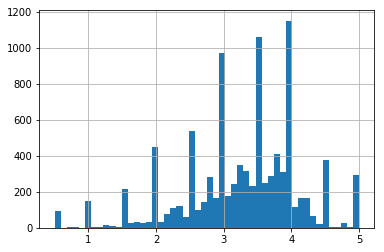

In [17]:
# Visualize
ratings['rating'].hist(bins=50)

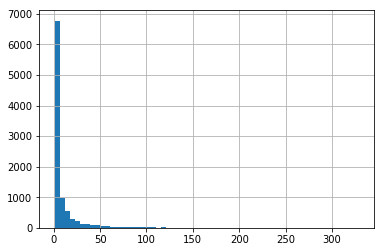

In [19]:
ratings['number_of_ratings'].hist(bins=60)

From the above histogram it is clear that most movies have few ratings.

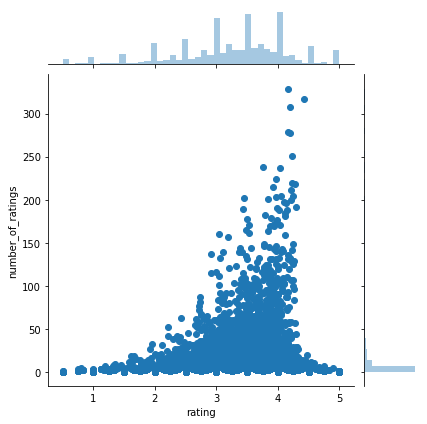

In [22]:
import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)

The graph indicates that the more the ratings a movie gets, the higher the average the rating it gets<br>
=> this is important to note especially when choosing the threshold for the number of ratings per movie